In [1]:
cd /home/dmoi/projects/foldtree2

/home/dmoi/projects/foldtree2


In [2]:
import wget
#download an example pdb file
filename = './1eei (1).pdb'
url = 'https://files.rcsb.org/download/1EEI.pdb'
#filename = wget.download(url)
datadir = '../../datasets/foldtree2/'

In [3]:
import foldtree2_ecddcd as ft2
converter = ft2.PDB2PyG()

/home/dmoi/miniforge3/envs/pyg/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from Bio import PDB
import warnings
from matplotlib import pyplot as plt
import numpy as np
import pydssp
import tqdm
from Bio.PDB import PDBParser   
import numpy as np

In [5]:
filename = './1eei.pdb'
res  = converter.create_features(filename, distance = 10, verbose = False )
print(len(res))
angles, contact_points, springmat , hbond_mat, backbone , backbone_rev , positional_encoding , plddt , aa , bondangles , foldxvals = res

11


In [6]:


import multiprocessing as mp
import tqdm
import os
import numpy as np
import wget 
import pandas as pd

"""
datadir = '../../datasets/'
cols = 'repId_isDark_nMem_repLen_avgLen_repPlddt_avgPlddt_LCAtaxId'.split('_')
repdf = pd.read_table(datadir+ 'afdbclusters/2-repId_isDark_nMem_repLen_avgLen_repPlddt_avgPlddt_LCAtaxId.tsv')
repdf.columns = cols
print(repdf.head())
def download_pdb(rep ,structdir = datadir+'structs/'):
	url = f'https://alphafold.ebi.ac.uk/files/AF-{rep}-F1-model_v4.pdb'
	#check if file exists
	if os.path.exists( structdir + rep + '.pdb'):
		return structdir + rep + '.pdb'
	filename = wget.download(url, out=structdir + rep + '.pdb')
	return filename

def download(repdf , nreps = 100 , structdir = datadir +'structs/'):
	if not os.path.exists(structdir):
		os.makedirs(structdir)
	reps = repdf.repId.unique()
	if nreps:
		#select a random sample of representatives
		reps = np.random.choice(reps, nreps)
	with mp.Pool(20) as p:
		filenames = p.map(download_pdb, tqdm.tqdm(reps))
		return filenames
        
"""

"\ndatadir = '../../datasets/'\ncols = 'repId_isDark_nMem_repLen_avgLen_repPlddt_avgPlddt_LCAtaxId'.split('_')\nrepdf = pd.read_table(datadir+ 'afdbclusters/2-repId_isDark_nMem_repLen_avgLen_repPlddt_avgPlddt_LCAtaxId.tsv')\nrepdf.columns = cols\nprint(repdf.head())\ndef download_pdb(rep ,structdir = datadir+'structs/'):\n\turl = f'https://alphafold.ebi.ac.uk/files/AF-{rep}-F1-model_v4.pdb'\n\t#check if file exists\n\tif os.path.exists( structdir + rep + '.pdb'):\n\t\treturn structdir + rep + '.pdb'\n\tfilename = wget.download(url, out=structdir + rep + '.pdb')\n\treturn filename\n\ndef download(repdf , nreps = 100 , structdir = datadir +'structs/'):\n\tif not os.path.exists(structdir):\n\t\tos.makedirs(structdir)\n\treps = repdf.repId.unique()\n\tif nreps:\n\t\t#select a random sample of representatives\n\t\treps = np.random.choice(reps, nreps)\n\twith mp.Pool(20) as p:\n\t\tfilenames = p.map(download_pdb, tqdm.tqdm(reps))\n\t\treturn filenames\n        \n"

In [7]:
#download(repdf, nreps = 1000 , structdir = '../datasets/foldtree2/structs/' )

In [8]:
import torch
import os
import numpy as np

AVAIL_GPUS = min(1, torch.cuda.device_count())
BATCH_SIZE = 256 if AVAIL_GPUS else 64
# Path to the folder where the datasets are/should be downloaded
DATASET_PATH = os.environ.get("PATH_DATASETS", "data/")
# Path to the folder where the pretrained models are saved
CHECKPOINT_PATH = os.environ.get("PATH_CHECKPOINT", "saved_models/GNNs/")
#create the h5 dataset from the pdb files
import glob
import h5py

# Setting the seed for everything
torch.manual_seed(0)
np.random.seed(0)
# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [9]:
import  foldtree2_ecddcd as ft2
#reload ft2
import importlib
importlib.reload(ft2)
converter = ft2.PDB2PyG()

In [10]:
data_sample =converter.struct2pyg( filename, verbose=False)
print(data_sample)
ndim = data_sample['res'].x.shape[1]
ndim_godnode = data_sample['godnode'].x.shape[1]

HeteroData(
  identifier='1eei',
  AA={ x=[103, 20] },
  bondangles={ x=[103, 2] },
  plddt={ x=[103, 1] },
  positions={ x=[103, 256] },
  res={ x=[103, 844] },
  godnode={ x=[1, 5] },
  godnode4decoder={ x=[1, 5] },
  (res, backbone, res)={
    edge_attr=[102],
    edge_index=[2, 307],
  },
  (res, backbonerev, res)={
    edge_attr=[102],
    edge_index=[2, 205],
  },
  (res, contactPoints, res)={
    edge_attr=[928],
    edge_index=[2, 928],
  },
  (res, hbond, res)={
    edge_attr=[106],
    edge_index=[2, 106],
  },
  (res, informs, godnode)={ edge_index=[2, 103] },
  (godnode, informs, res)={ edge_index=[2, 103] },
  (res, informs, godnode4decoder)={ edge_index=[2, 103] },
  (godnode4decoder, informs, res)={ edge_index=[2, 103] }
)


In [11]:
#pdbfiles_structalign = glob.glob(datadir + 'struct_align/*/structs/*.pdb')

In [12]:
import glob
datadir = '../../datasets/'

In [13]:
#pdbfiles = glob.glob(datadir + 'structs/*.pdb')
#converter.store_pyg(pdbfiles_structalign, filename='structs_structalign_godnode.h5', verbose = False)

In [14]:
pdbfiles = glob.glob(datadir+'structs/*.pdb')
data_sample =converter.struct2pyg( pdbfiles[0], foldxdir='./foldx/',  verbose=False)

print(data_sample)
print( data_sample.edge_index_dict[('res' ,'informs','godnode4decoder' )].shape)
print( data_sample.edge_index_dict[('godnode4decoder' ,'informs','res' )].shape ) 
print( data_sample.edge_index_dict[('res' ,'informs','godnode4decoder' )].numpy().tolist()[0])
print( data_sample.edge_index_dict[('res' ,'informs','godnode4decoder' )].numpy().tolist()[1])


HeteroData(
  identifier='A0A1J5EX06',
  AA={ x=[385, 20] },
  Foldx={ x=[23] },
  bondangles={ x=[385, 2] },
  plddt={ x=[385, 1] },
  positions={ x=[385, 256] },
  res={ x=[385, 844] },
  godnode={ x=[1, 5] },
  godnode4decoder={ x=[1, 5] },
  (res, backbone, res)={
    edge_attr=[384],
    edge_index=[2, 1153],
  },
  (res, backbonerev, res)={
    edge_attr=[384],
    edge_index=[2, 769],
  },
  (res, contactPoints, res)={
    edge_attr=[2922],
    edge_index=[2, 2922],
  },
  (res, hbond, res)={
    edge_attr=[246],
    edge_index=[2, 246],
  },
  (res, informs, godnode)={ edge_index=[2, 385] },
  (godnode, informs, res)={ edge_index=[2, 385] },
  (res, informs, godnode4decoder)={ edge_index=[2, 385] },
  (godnode4decoder, informs, res)={ edge_index=[2, 385] }
)
torch.Size([2, 385])
torch.Size([2, 385])
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47

In [15]:
#converter.store_pyg(pdbfiles, filename='structs_training_godnodemk3.h5', foldxdir = './foldx/', verbose = False)

In [16]:
#read the foldx values from the h5 file and store them in a pandas dataframe
"""
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tqdm

from torch_geometric.data import DataLoader

struct_dat = ft2.StructureDataset('structs_training_godnodemk3.h5')
train_loader = DataLoader(struct_dat, batch_size=1, shuffle=True)
pdbs = []
foldxvals = []
for data in tqdm.tqdm(train_loader):

	pdbs.append(data.identifier[0])
	foldxvals.append(data['Foldx'].x.to('cpu').numpy())
foldxvals = np.vstack(foldxvals)
print(foldxvals , foldxvals.shape)	
print(len(pdbs) , pdbs)
foldx = pd.DataFrame(foldxvals, index = pdbs)

print( foldx)
#make histograms of the foldx values
for c in foldx.columns:
	plt.hist(foldx[c], bins = 20)
	plt.title(c)
	plt.show()
#find mean and var of each column of the foldx values
mean = foldx.mean()
variance = foldx.var()
print(mean)
print(variance)

#replace nan in mean and variance with 0
mean = mean.fillna(0)
variance = variance.fillna(0)

#save the mean and variance
mean.to_csv('foldxmean.csv')
variance.to_csv('foldxvariance.csv')
"""



"\nimport pandas as pd\nimport numpy as np\nfrom matplotlib import pyplot as plt\nimport tqdm\n\nfrom torch_geometric.data import DataLoader\n\nstruct_dat = ft2.StructureDataset('structs_training_godnodemk3.h5')\ntrain_loader = DataLoader(struct_dat, batch_size=1, shuffle=True)\npdbs = []\nfoldxvals = []\nfor data in tqdm.tqdm(train_loader):\n\n\tpdbs.append(data.identifier[0])\n\tfoldxvals.append(data['Foldx'].x.to('cpu').numpy())\nfoldxvals = np.vstack(foldxvals)\nprint(foldxvals , foldxvals.shape)\t\nprint(len(pdbs) , pdbs)\nfoldx = pd.DataFrame(foldxvals, index = pdbs)\n\nprint( foldx)\n#make histograms of the foldx values\nfor c in foldx.columns:\n\tplt.hist(foldx[c], bins = 20)\n\tplt.title(c)\n\tplt.show()\n#find mean and var of each column of the foldx values\nmean = foldx.mean()\nvariance = foldx.var()\nprint(mean)\nprint(variance)\n\n#replace nan in mean and variance with 0\nmean = mean.fillna(0)\nvariance = variance.fillna(0)\n\n#save the mean and variance\nmean.to_csv('fold

In [17]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import VGAE
from torch.optim import Adam
from torch_geometric.data import DataLoader
import pickle
import pandas as pd
import os
import tqdm

# Create a DataLoader for training
total_loss_x= 0
total_loss_edge = 0
total_vq=0
total_kl = 0
total_foldx=0

# Training loop

In [18]:
#load model if it exists
#add positional encoder channels to input

encoder_layers = 3
decoder_layers = 5

encoder = ft2.HeteroGAE_Encoder(in_channels={'res':ndim , 'godnode':ndim_godnode}
								, hidden_channels= {
											( 'res','backbone','res'):[  300 ] * encoder_layers, 
											 ('res', 'backbonerev', 'res'): [300] * encoder_layers ,
											 ('res', 'contactPoints', 'res'): [300] * encoder_layers ,
											 }  , 
						layers = encoder_layers , 
						out_channels=10 , metadata=converter.metadata , num_embeddings=64, 
						commitment_cost= .8 , encoder_hidden= 200  , nheads = 4 , average = False
						, reset_codes= False , dropout_p=0.001 , separated = True , flavor = 'mfconv' )


print( encoder.out_channels)
decoder = ft2.HeteroGAE_Decoder(in_channels = {'res':encoder.out_channels , 'godnode4decoder':ndim_godnode , 'foldx':23 } , 
							hidden_channels={
											( 'res','backbone','res'):[  500 ] * decoder_layers , 
											('res', 'backbonerev', 'res'): [500] * decoder_layers ,
											('res' ,'informs','godnode4decoder' ):[  500 ] * decoder_layers ,
											('godnode4decoder' ,'informs','res' ):[  500 ] * decoder_layers 

											},

							layers = decoder_layers ,
							metadata=converter.metadata , 
							amino_mapper = converter.aaindex ,
							flavor = 'sage' ,
							Xdecoder_hidden= 300 ,
							PINNdecoder_hidden = [1000, 1000 , 1000 ] ,
							  nheads = 1 , dropout = 0.001  ,
							  AAdecoder_hidden = [1000,1000,1000]  )    

encoder_save = 'testgodnode'
decoder_save = 'testgodnode'
overwrite = True



#load mean and variance	and turn them into tensors	
mean = pd.read_csv('foldxmean.csv', index_col = 0)
variance = pd.read_csv('foldxvariance.csv', index_col = 0)
mean = torch.tensor(mean.values).float()
variance = torch.tensor(variance.values).float()

if os.path.exists(encoder_save) and overwrite == False:
	encoder.load_state_dict(torch.load(encoder_save ))
if os.path.exists(decoder_save) and overwrite == False:
	decoder.load_state_dict(torch.load(decoder_save  ))

#create a training loop for the GAE model
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
#device = torch.device( 'cpu')
print(device)
train_loop = True
V_train_loop = False

batch_size = 60

betafactor = 2
#stack mean and variance to the same shape as the foldx values
mean = mean.repeat(batch_size,1)
variance = variance.repeat(batch_size,1)


#put the mean and variance on the device
mean = mean.to(device)
variance = variance.to(device)

print(mean.shape)
print(variance.shape)
#remove last dimension from mean and variance
mean = mean.squeeze()
variance = variance.squeeze()

#put encoder and decoder on the device
encoder = encoder.to(device)
decoder = decoder.to(device)


Seed set to 42
Seed set to 42


encoder convolutions
ModuleList(
  (0): ModuleDict(
    (res_backbone_res): MFConv(844, 300)
    (res_backbonerev_res): MFConv(300, 300)
    (res_contactPoints_res): MFConv(300, 300)
  )
  (1-2): 2 x ModuleDict(
    (res_backbone_res): MFConv(300, 300)
    (res_backbonerev_res): MFConv(300, 300)
    (res_contactPoints_res): MFConv(300, 300)
  )
)
10
decoder convs
ModuleList(
  (0-4): 5 x HeteroConv(num_relations=4)
)
batchnorm BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
dropout Dropout(p=0.001, inplace=False)
10
300
aadecoder Sequential(
  (0): Linear(in_features=310, out_features=1000, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1000, out_features=1000, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1000, out_features=1000, bias=True)
  (5): ReLU()
  (6): Linear(in_features=1000, out_features=20, bias=True)
  (7): LogSoftmax(dim=1)
)
lin Sequential(
  (0): Linear(in_features=500, out_features=300, bias=True)
)
sigmoid Sigmoid()
cuda:1
tor

In [19]:
#use autoreload
struct_dat = ft2.StructureDataset('structs_training_godnodemk3.h5')

In [20]:
if train_loop == True:
	train_loader = DataLoader(struct_dat, batch_size=batch_size, shuffle=True)
	optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.001)
	encoder.train()
	decoder.train()
	xlosses = []
	edgelosses = []
	vqlosses = []
	foldxlosses = []
	
	edgeweight = 1
	xweight = 1
	vqweight = 1
	foldxweight = 1
	init = False
	
	for epoch in range(1000):
		for data in tqdm.tqdm(train_loader):
			data = data.to(device)
			
			if init == False:
				with torch.no_grad():  # Initialize lazy modules.

					z,vqloss = encoder.forward(data.x_dict , data.edge_index_dict)
					recon_x , edge_probs , zgodnode , foldxout = decoder( z, data.x_dict, data.edge_index_dict , None ) 
					init = True
			#normalize the foldx values
			foldx = data['Foldx'].x
			#elementwise normalization
			try:
				foldx = (foldx - mean)/( variance + 10**-6 )
			except Exception as e:
				print(e)
				print('error')
				continue

			optimizer.zero_grad()
			z,vqloss = encoder.forward(data.x_dict , data.edge_index_dict)
			#add positional encoding to give to the decoder
			#remove the godnode from data xdict, set the residues to the embeddings
			#data.x_dict.pop('godnode')
			#data.x_dict['res'] = z
			#print( z.shape)

			edgeloss = ft2.recon_loss( z , data.x_dict, data.edge_index_dict , data.edge_index_dict[('res', 'contactPoints', 'res')] , decoder)
			recon_x , edge_probs , zgodnode , foldxout = decoder( z, data.x_dict, data.edge_index_dict , None ) 
			xloss = ft2.aa_reconstruction_loss(data['AA'].x, recon_x)
			#get mse loss for foldx values
			#reshape foldxout to the same shape as foldx
			foldxout = foldxout.view(foldx.shape)
			foldxloss = F.mse_loss( foldxout , foldx )

			#plddtloss = x_reconstruction_loss(data['plddt'].x, recon_plddt)
			loss = xweight*xloss + edgeweight*edgeloss + vqweight*vqloss + foldxloss*foldxweight
			loss.backward()
			optimizer.step()
			total_loss_edge += edgeloss.item()
			total_loss_x += xloss.item()
			total_vq += vqloss.item()
			total_foldx += foldxloss.item()
			#total_plddt += plddtloss.item()
		if epoch % 100 == 0 :
			#save model
			torch.save(encoder.state_dict(), encoder_save)
			torch.save(decoder.state_dict(), decoder_save)
		"""
		for loss in [( total_loss_x , xlosses , xweight ), (total_loss_edge, edgelosses, edgeweight), ( total_vq, vqlosses, vqweight ) ]:
			loss[1].append(loss[0])
			#calculate the mean delta loss for past 10 epochs
			if len(loss[1]) > 10:
				loss[1].pop(0)
				mean_loss = np.mean(loss[0:5])
				#calculate the delta loss for the last 5 epochs
				delta_loss = np.mean(loss[1][-5:])
				delta_loss = delta_loss- mean_loss
				if delta_loss > 0:
					loss[2] = loss[2]*2
				else:
					loss[2] = loss[2]/1.5
				loss[2] = np.clip(loss[2], 1e-5, 1e5)
		"""    
		print(f'Epoch {epoch}, AALoss: {total_loss_x:.4f}, Edge Loss: {total_loss_edge:.4f}, vq Loss: {total_vq:.4f} , foldx Loss: {total_foldx:.4f}')
		total_loss_x = 0
		total_loss_edge = 0
		total_vq = 0
		total_foldx = 0
	torch.save(encoder.state_dict(), encoder_save)
	torch.save(decoder.state_dict(), decoder_save)

100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:24<00:00,  1.52s/it]

The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error


Epoch 0, AALoss: 272.6301, Edge Loss: 235.5867, vq Loss: 329.5995 , foldx Loss: 13.0074


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:28<00:00,  1.56s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 1, AALoss: 271.1148, Edge Loss: 95.9283, vq Loss: 186.3193 , foldx Loss: 9.3127


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.56s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 2, AALoss: 269.5998, Edge Loss: 89.0045, vq Loss: 91.1635 , foldx Loss: 7.5872


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.56s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 3, AALoss: 268.4126, Edge Loss: 86.7808, vq Loss: 33.5556 , foldx Loss: 7.0396


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:28<00:00,  1.56s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 4, AALoss: 266.9784, Edge Loss: 85.8933, vq Loss: -44.0146 , foldx Loss: 6.4157


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:29<00:00,  1.57s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 5, AALoss: 265.2041, Edge Loss: 85.8698, vq Loss: -121.2862 , foldx Loss: 6.1796


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:28<00:00,  1.56s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 6, AALoss: 250.9900, Edge Loss: 88.8464, vq Loss: -148.3218 , foldx Loss: 6.9412


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:29<00:00,  1.58s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 7, AALoss: 137.6531, Edge Loss: 107.4372, vq Loss: 64.0859 , foldx Loss: 12.2561


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.55s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 8, AALoss: 95.3610, Edge Loss: 100.0670, vq Loss: 35.0179 , foldx Loss: 11.6577


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:25<00:00,  1.53s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 9, AALoss: 78.0985, Edge Loss: 96.1659, vq Loss: 4.2915 , foldx Loss: 11.4089


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.56s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 10, AALoss: 83.0009, Edge Loss: 97.2836, vq Loss: 7.4472 , foldx Loss: 11.6955


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.55s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 11, AALoss: 72.2878, Edge Loss: 95.5904, vq Loss: 8.5018 , foldx Loss: 11.1137


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:25<00:00,  1.53s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 12, AALoss: 74.0844, Edge Loss: 94.8193, vq Loss: 14.2816 , foldx Loss: 10.5825


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:28<00:00,  1.56s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 13, AALoss: 64.0278, Edge Loss: 94.8964, vq Loss: -24.8111 , foldx Loss: 10.5772


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:30<00:00,  1.59s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 14, AALoss: 58.6504, Edge Loss: 94.1346, vq Loss: -43.4933 , foldx Loss: 9.8502


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:31<00:00,  1.59s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 15, AALoss: 41.0500, Edge Loss: 93.9508, vq Loss: -96.7038 , foldx Loss: 9.5582


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:28<00:00,  1.56s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 16, AALoss: 35.2321, Edge Loss: 92.8366, vq Loss: -115.0727 , foldx Loss: 8.1425


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.55s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 17, AALoss: 31.2869, Edge Loss: 92.3936, vq Loss: -117.0829 , foldx Loss: 7.8407


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:24<00:00,  1.52s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 18, AALoss: 27.3415, Edge Loss: 91.3193, vq Loss: -126.8451 , foldx Loss: 7.2047


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 19, AALoss: 21.5583, Edge Loss: 89.0909, vq Loss: -140.5625 , foldx Loss: 6.5031


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 20, AALoss: 21.3241, Edge Loss: 88.5398, vq Loss: -144.8356 , foldx Loss: 6.2063


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:25<00:00,  1.53s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 21, AALoss: 20.4045, Edge Loss: 88.6166, vq Loss: -152.2211 , foldx Loss: 5.9882


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:28<00:00,  1.56s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 22, AALoss: 21.1618, Edge Loss: 87.8789, vq Loss: -157.8711 , foldx Loss: 5.9600


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 23, AALoss: 19.1289, Edge Loss: 87.0956, vq Loss: -161.2357 , foldx Loss: 5.7104


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:32<00:00,  1.60s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 24, AALoss: 19.1056, Edge Loss: 87.3661, vq Loss: -162.2355 , foldx Loss: 5.7008


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.55s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 25, AALoss: 18.5198, Edge Loss: 87.2401, vq Loss: -170.8513 , foldx Loss: 5.4950


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 26, AALoss: 18.5330, Edge Loss: 87.0970, vq Loss: -182.9959 , foldx Loss: 5.6083


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.55s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 27, AALoss: 18.3889, Edge Loss: 86.5745, vq Loss: -185.2705 , foldx Loss: 5.4498


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 28, AALoss: 12.1037, Edge Loss: 86.3086, vq Loss: -203.6371 , foldx Loss: 5.5640


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 29, AALoss: 10.2428, Edge Loss: 86.3268, vq Loss: -206.4219 , foldx Loss: 5.4204


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.55s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 30, AALoss: 10.0074, Edge Loss: 85.8871, vq Loss: -206.2260 , foldx Loss: 5.1589


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 31, AALoss: 10.2307, Edge Loss: 85.8107, vq Loss: -206.6919 , foldx Loss: 5.0537


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:28<00:00,  1.57s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 32, AALoss: 15.7481, Edge Loss: 87.9546, vq Loss: -199.3022 , foldx Loss: 6.6817


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 33, AALoss: 11.9468, Edge Loss: 87.1659, vq Loss: -208.3563 , foldx Loss: 5.5932


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 34, AALoss: 11.3828, Edge Loss: 86.4587, vq Loss: -208.3152 , foldx Loss: 5.1839


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.55s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 35, AALoss: 13.7331, Edge Loss: 86.5164, vq Loss: -207.8320 , foldx Loss: 5.2333


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.55s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 36, AALoss: 11.0826, Edge Loss: 86.4913, vq Loss: -210.0851 , foldx Loss: 5.2092


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:29<00:00,  1.57s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 37, AALoss: 10.2015, Edge Loss: 85.9181, vq Loss: -212.0568 , foldx Loss: 5.3167


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 38, AALoss: 9.8919, Edge Loss: 85.4989, vq Loss: -220.3366 , foldx Loss: 4.9210


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.55s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 39, AALoss: 9.8509, Edge Loss: 85.2676, vq Loss: -221.4642 , foldx Loss: 4.8917


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:25<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 40, AALoss: 9.7727, Edge Loss: 85.2958, vq Loss: -223.4734 , foldx Loss: 5.0310


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 41, AALoss: 9.7646, Edge Loss: 84.9616, vq Loss: -226.1797 , foldx Loss: 5.0071


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:25<00:00,  1.53s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 42, AALoss: 11.9706, Edge Loss: 86.1493, vq Loss: -227.9198 , foldx Loss: 5.3532


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 43, AALoss: 8.0063, Edge Loss: 85.4216, vq Loss: -233.8002 , foldx Loss: 4.9093


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 44, AALoss: 6.6382, Edge Loss: 85.5278, vq Loss: -238.9344 , foldx Loss: 5.0154


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:25<00:00,  1.53s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 45, AALoss: 6.7483, Edge Loss: 85.8893, vq Loss: -236.2880 , foldx Loss: 5.0508


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 46, AALoss: 6.7180, Edge Loss: 85.1393, vq Loss: -235.0216 , foldx Loss: 4.8318


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:28<00:00,  1.57s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 47, AALoss: 6.6796, Edge Loss: 85.3062, vq Loss: -236.2334 , foldx Loss: 4.9023


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:29<00:00,  1.57s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 48, AALoss: 6.7567, Edge Loss: 84.7524, vq Loss: -236.9452 , foldx Loss: 4.9513


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.55s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 49, AALoss: 7.3640, Edge Loss: 84.7563, vq Loss: -235.1294 , foldx Loss: 4.7773


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:25<00:00,  1.53s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 50, AALoss: 7.3281, Edge Loss: 85.3672, vq Loss: -233.3776 , foldx Loss: 4.7716


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.55s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 51, AALoss: 8.1229, Edge Loss: 85.5165, vq Loss: -232.7138 , foldx Loss: 5.0063


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:28<00:00,  1.56s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 52, AALoss: 6.7922, Edge Loss: 85.3920, vq Loss: -231.9294 , foldx Loss: 5.0270


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.55s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 53, AALoss: 6.7526, Edge Loss: 84.9856, vq Loss: -235.8370 , foldx Loss: 5.0721


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.56s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 54, AALoss: 8.5676, Edge Loss: 84.7264, vq Loss: -238.2914 , foldx Loss: 4.9596


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.55s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 55, AALoss: 2968.4351, Edge Loss: 1496.1977, vq Loss: 151475.1557 , foldx Loss: 14.5324


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:23<00:00,  1.51s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 56, AALoss: 277.0621, Edge Loss: 2164.4308, vq Loss: 483.4663 , foldx Loss: 13.2913


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:21<00:00,  1.49s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 57, AALoss: 275.2984, Edge Loss: 2164.4307, vq Loss: 483.4663 , foldx Loss: 13.2531


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:22<00:00,  1.50s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 58, AALoss: 274.2521, Edge Loss: 2164.4308, vq Loss: 483.4663 , foldx Loss: 13.1084


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:28<00:00,  1.57s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 59, AALoss: 273.5862, Edge Loss: 2164.4307, vq Loss: 483.4663 , foldx Loss: 13.2845


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 60, AALoss: 273.1543, Edge Loss: 2164.4308, vq Loss: 483.4663 , foldx Loss: 13.2864


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.55s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 61, AALoss: 272.8787, Edge Loss: 2164.4307, vq Loss: 483.4663 , foldx Loss: 13.2950


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 62, AALoss: 272.6858, Edge Loss: 2164.4308, vq Loss: 483.4663 , foldx Loss: 13.2640


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:23<00:00,  1.51s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 63, AALoss: 272.5610, Edge Loss: 2164.4308, vq Loss: 483.4663 , foldx Loss: 13.2717


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:24<00:00,  1.52s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 64, AALoss: 272.4828, Edge Loss: 2164.4307, vq Loss: 483.4663 , foldx Loss: 13.2792


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:22<00:00,  1.50s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 65, AALoss: 272.4271, Edge Loss: 2164.4307, vq Loss: 483.4663 , foldx Loss: 13.2564


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:24<00:00,  1.52s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 66, AALoss: 272.3851, Edge Loss: 2164.4308, vq Loss: 483.4663 , foldx Loss: 13.2505


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.55s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 67, AALoss: 272.3594, Edge Loss: 2164.4307, vq Loss: 483.4663 , foldx Loss: 13.2764


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:22<00:00,  1.50s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 68, AALoss: 272.3300, Edge Loss: 2164.4307, vq Loss: 483.4663 , foldx Loss: 13.2894


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:21<00:00,  1.49s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 69, AALoss: 272.3397, Edge Loss: 2164.4308, vq Loss: 483.4649 , foldx Loss: 13.2264


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:20<00:00,  1.48s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 70, AALoss: 272.3122, Edge Loss: 2164.4307, vq Loss: 483.4647 , foldx Loss: 13.3000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:23<00:00,  1.51s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 71, AALoss: 272.3088, Edge Loss: 2164.4307, vq Loss: 483.4648 , foldx Loss: 13.2617


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:24<00:00,  1.52s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 72, AALoss: 272.3136, Edge Loss: 2164.4307, vq Loss: 483.4520 , foldx Loss: 13.2295


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:22<00:00,  1.50s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 73, AALoss: 272.2972, Edge Loss: 2164.4308, vq Loss: 483.4604 , foldx Loss: 13.2322


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:24<00:00,  1.52s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 74, AALoss: 272.3150, Edge Loss: 2164.4308, vq Loss: 483.4564 , foldx Loss: 13.2480


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:23<00:00,  1.51s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 75, AALoss: 272.3222, Edge Loss: 2164.4308, vq Loss: 483.4587 , foldx Loss: 13.2444


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:23<00:00,  1.51s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 76, AALoss: 272.3006, Edge Loss: 2164.4309, vq Loss: 483.0945 , foldx Loss: 13.2508


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:26<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 77, AALoss: 272.3145, Edge Loss: 2164.4308, vq Loss: 482.0155 , foldx Loss: 13.2503


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:24<00:00,  1.52s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 78, AALoss: 272.3198, Edge Loss: 2164.4307, vq Loss: 481.9667 , foldx Loss: 13.2062


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:23<00:00,  1.51s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 79, AALoss: 272.3038, Edge Loss: 2164.4307, vq Loss: 482.3646 , foldx Loss: 13.2590


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:20<00:00,  1.48s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 80, AALoss: 272.3007, Edge Loss: 2164.4307, vq Loss: 483.0204 , foldx Loss: 13.1861


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:21<00:00,  1.49s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 81, AALoss: 272.3101, Edge Loss: 2164.4308, vq Loss: 483.1372 , foldx Loss: 13.2915


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:21<00:00,  1.49s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 82, AALoss: 272.2972, Edge Loss: 2164.4307, vq Loss: 480.8149 , foldx Loss: 13.1835


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:21<00:00,  1.49s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 83, AALoss: 272.3178, Edge Loss: 2164.4308, vq Loss: 480.4887 , foldx Loss: 13.2306


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:22<00:00,  1.50s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 84, AALoss: 272.2945, Edge Loss: 2164.4306, vq Loss: 480.4666 , foldx Loss: 13.1951


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:21<00:00,  1.49s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 85, AALoss: 272.2882, Edge Loss: 2164.4307, vq Loss: 480.4342 , foldx Loss: 13.2960


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:21<00:00,  1.49s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 86, AALoss: 272.2945, Edge Loss: 2164.4307, vq Loss: 480.4377 , foldx Loss: 13.2233


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:21<00:00,  1.49s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 87, AALoss: 272.2990, Edge Loss: 2164.4307, vq Loss: 480.4311 , foldx Loss: 13.2469


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:24<00:00,  1.52s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 88, AALoss: 272.2854, Edge Loss: 2164.4308, vq Loss: 480.5391 , foldx Loss: 13.2932


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:27<00:00,  1.55s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 89, AALoss: 272.3199, Edge Loss: 2164.4308, vq Loss: 480.7528 , foldx Loss: 13.2866


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [02:25<00:00,  1.54s/it]


The size of tensor a (1104) must match the size of tensor b (1380) at non-singleton dimension 0
error
Epoch 90, AALoss: 272.2939, Edge Loss: 2164.4308, vq Loss: 481.1827 , foldx Loss: 13.2834


 51%|█████████████████████████████████████████████████████████████▏                                                           | 48/95 [01:13<01:12,  1.54s/it]


KeyboardInterrupt: 

In [103]:
#predict the embeddings for a structure
def predict_structure(structure, encoder, decoder):
	encoder.eval()
	decoder.eval()
	data = converter.struct2pyg(structure)
	data = data.to(device)
	z,qloss = encoder.forward(data['res'].x , data['AA'].x,  data.edge_index_dict)
	#create all vs all edge index
	edge_index = torch.tensor( [ [i,j] for i in range(z.shape[0]) for j in range(z.shape[0]) ] ).T
	#z = torch.cat([ data['positions'].x , z] , axis = 1)
	recon_x, edge_probs = decoder(z , edge_index , data.edge_index_dict )
	return z, recon_x, edge_probs , data

: 

: 

: 

: 

: 

: 

In [104]:
from matplotlib import pyplot as plt
from Bio.PDB import PDBParser
from Bio import PDB

def plot_embeddings(filename, encoder, decoder):
	z, recon_x, edge_probs,data = predict_structure(filename, encoder, decoder)
	z = z.detach().cpu().numpy()
	edge_probs = edge_probs.detach().cpu().numpy()
	print(edge_probs.shape)
	#reshape the edge probabilities into a matrix
	edge_probs = edge_probs.reshape((z.shape[0], z.shape[0]))
	print(edge_probs.shape)
	print(edge_probs)
	#get edge index for the structure
	#plot the edge probabilities
	plt.figure(figsize=(10,10))
	plt.title('Edge Probabilities ' + filename)
	plt.imshow(1-edge_probs)
	plt.colorbar()
	plt.show()


	plt.figure(figsize=(10,10))
	plt.title('log Edge Probabilities ' + filename)
	plt.imshow( np.log( 1-edge_probs ))
	plt.colorbar()
	plt.show()

	#plot the distance matrix
	chain = converter.read_pdb(filename)[0]
	chain = [ r for r in chain if PDB.is_aa(r)]
	distances = np.zeros((len(chain), len(chain)))
	for i in range(len(chain)):
		for j in range(len(chain)):
			distances[i,j] = chain[i]['CA'] - chain[j]['CA']
	plt.figure(figsize=(10,10))
	plt.title('distmat ' + filename)

	plt.imshow(distances)
	plt.colorbar()

	distances[distances>10] = 0
	plt.figure(figsize=(10,10))
	plt.title('contactmat ' + filename)

	plt.imshow(distances)
	plt.colorbar()
	#transform the embeddings to the quantized string
	encoded_string = encoder.vector_quantizer.discretize_z(torch.tensor(z).to(device))
	print('encoded', encoded_string)
	plt.show()
	
	plt.imshow(recon_x.detach().cpu().numpy())
	plt.colorbar()
	plt.show()

	plt.imshow(data['AA'].x.detach().cpu().numpy())
	plt.colorbar()
	plt.show()


: 

: 

: 

: 

: 

: 

(10609,)
(103, 103)
[[0.996064   0.9953792  0.99507624 ... 0.9871723  0.9890037  0.98846614]
 [0.9953792  0.9949114  0.9945709  ... 0.9883937  0.9903499  0.98971844]
 [0.99507624 0.9945709  0.9944259  ... 0.98581934 0.98827016 0.9872348 ]
 ...
 [0.9871723  0.9883937  0.98581934 ... 0.99469596 0.9952253  0.9954921 ]
 [0.9890037  0.9903499  0.98827016 ... 0.9952253  0.996503   0.99618703]
 [0.98846614 0.98971844 0.9872348  ... 0.9954921  0.99618703 0.99629384]]


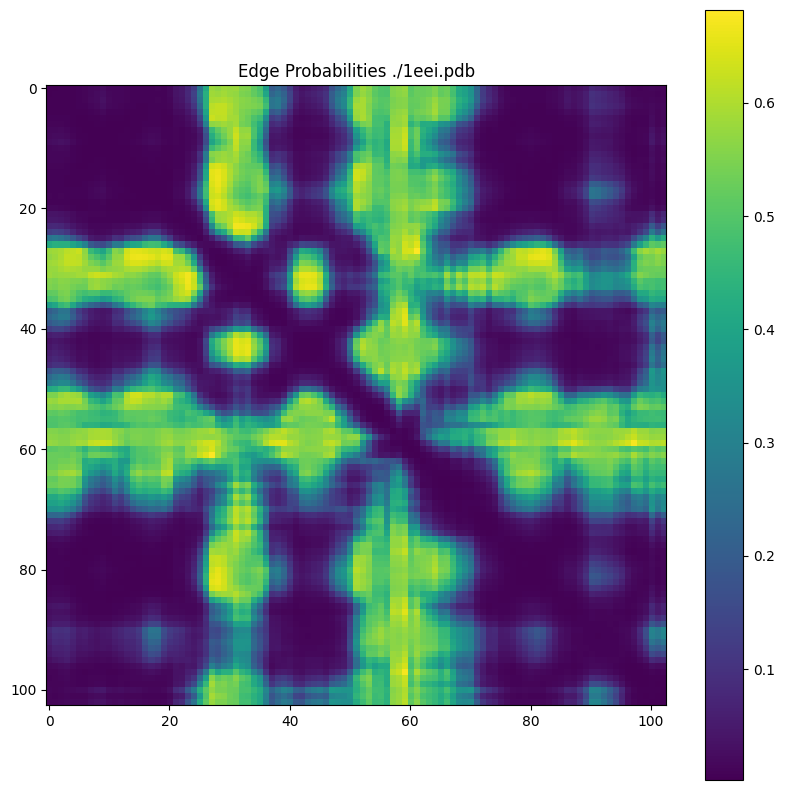

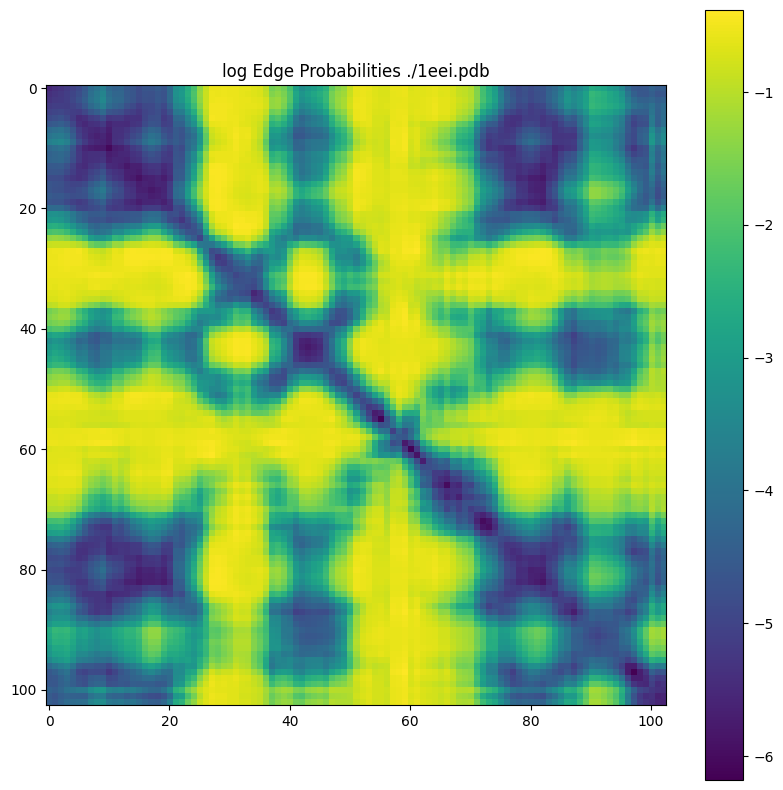

encoded (tensor([234, 234, 219, 165,  60, 191, 234,  84, 240,  95, 211, 247, 179,  61,
         90, 234, 165, 191,  61, 234, 240,  90,  84,  94, 191,  68, 167, 179,
         64,  56, 111, 122, 211, 185,  94, 182,  56, 171, 211, 191, 191, 234,
         68,  94,  60,  23, 211, 234,  68, 227, 121,  56, 121, 219, 185, 125,
        137, 130, 201,  83, 160, 227, 223, 223, 211, 191,  56,  17, 171, 223,
         83,  62, 240,  17, 191, 211, 179, 240, 234,  78, 211, 139, 121,  78,
        139, 240,  95, 121,   8,  60,  60,  94, 234, 138,  61, 211, 191, 211,
        211, 191, 158, 171,  90], device='cuda:0'), ['ê', 'ê', 'Û', '¥', '<', '¿', 'ê', 'T', 'ð', '_', 'Ó', '÷', '³', '=', 'Z', 'ê', '¥', '¿', '=', 'ê', 'ð', 'Z', 'T', '^', '¿', 'D', '§', '³', '@', '8', 'o', 'z', 'Ó', '¹', '^', '¶', '8', '«', 'Ó', '¿', '¿', 'ê', 'D', '^', '<', '\x17', 'Ó', 'ê', 'D', 'ã', 'y', '8', 'y', 'Û', '¹', '}', '\x89', '\x82', 'É', 'S', '\xa0', 'ã', 'ß', 'ß', 'Ó', '¿', '8', '\x11', '«', 'ß', 'S', '>', 'ð', '\x11', '¿',

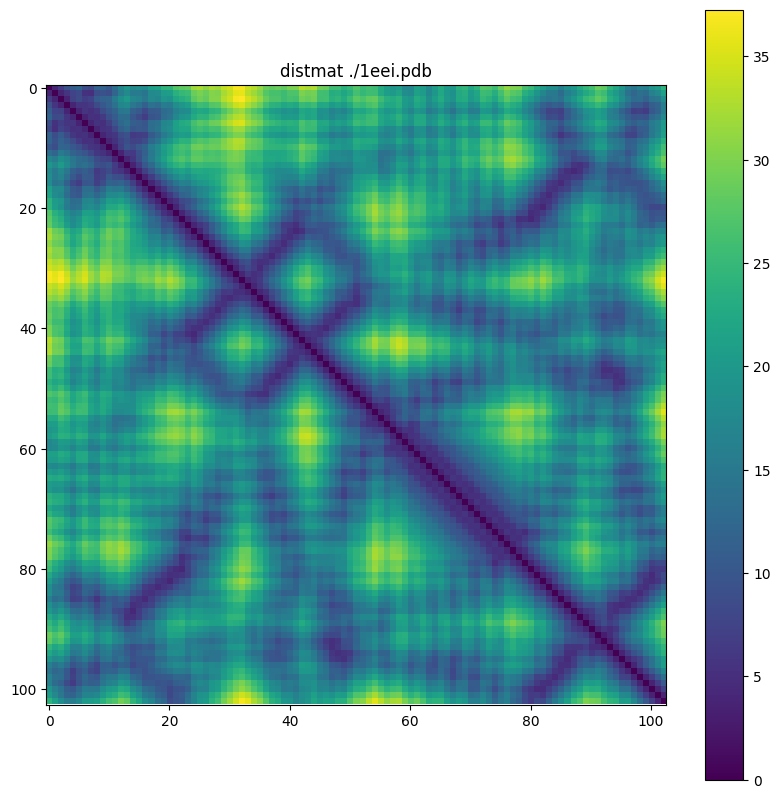

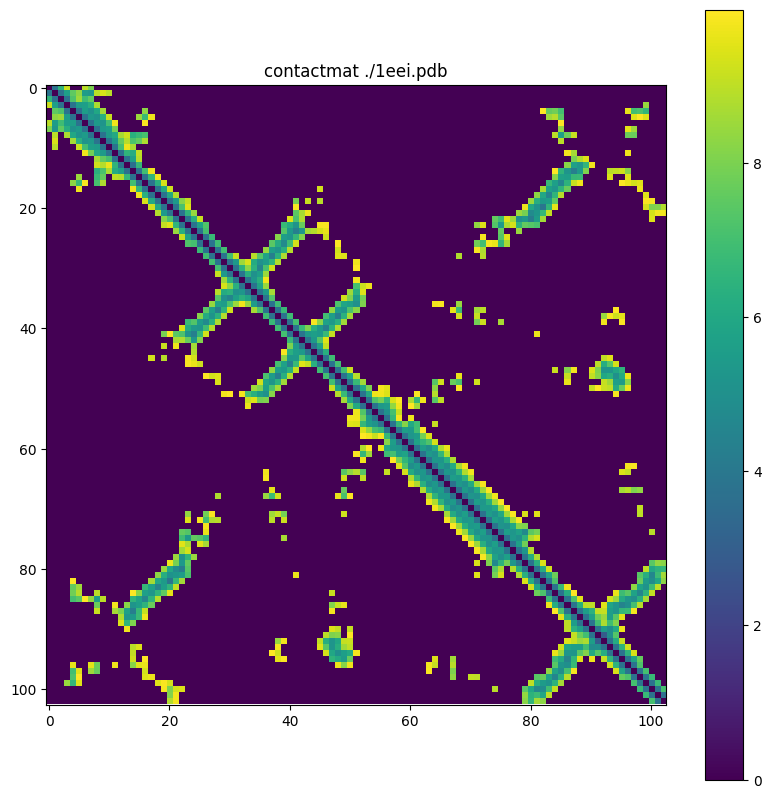

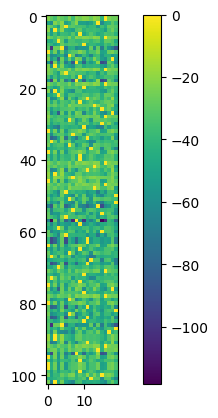

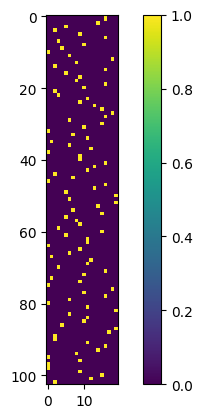

: 

: 

: 

: 

: 

: 

In [105]:
plot_embeddings(filename, encoder, decoder)


In [108]:
#add the encoded structures to the struct align hdf5

import time
import glob
import h5py
datadir = '../../datasets/foldtree2/'
pdbfiles_structalign = glob.glob(datadir + 'struct_align/*/structs/*.pdb')


: 

: 

: 

: 

: 

: 

In [109]:
print( len(pdbfiles_structalign) )

9390


: 

: 

: 

: 

: 

: 

In [ ]:
#use autoreload
#alndbmk2 = converter.store_pyg( pdbfiles_structalign, filename='structalignmk2.h5', verbose = False )

: 

: 

: 

: 

: 

: 

In [107]:

encoder.encode_structures_fasta( loader , 'aln_encoded.fasta')

7836it [1:01:35,  2.12it/s]


'aln_encoded.fasta'

: 

: 

: 

: 

: 

: 

In [84]:
loader = dataloader(pdbfiles_structalign[0:10])
encoder.encode_structures_fasta( loader , 'aln_encoded_test.fasta' )

with open('aln_encoded_test.fasta') as f:
	print(f.read())

10it [00:02,  4.49it/s]


>A0A0B0EGE4
«Ëy<<Ûf¿^^¿÷¿>ÓoTÓyÓ³¤¤<<ß¶ßß¤é÷¤÷÷^D§>>¿¿¿<¿¿¥^>÷y>><_>T§÷<¿y

>A0A6M1Q9D4
¿¿¤÷÷ã<÷^y>¤_y=Û`¿÷y`¿ß§¹¤§ß¤DDß`¹¿^y^ÓyÛ§³Dð@÷D=DD<Ó^T÷÷¿ð

>A0A7W6LMN5
ËË^.óÛ¹Ó¶D¶³³yo8¹^Û¹ ð«@8«ó^¾@@¾8@^Ü¤ßß.¶ßãDSS_Sß8ÚiãÛ¤Ug\zUóÜÃ66Ó¿y?¶_oDño÷ÓSÛð¶}.gógÄ0ÄÛÛ£.ïH6£U£.Ug#ÄSS	dgX|

£.£ÜïWgg­0}£WÜ





0 Z	

ÛâdçÛÛïSÎ£dS££dÎÇçÛë0)ÎYë­£±ç£ÛcëÆd£Üpc~

EE&ï­Ò­#SSUEUS 0Òç	SSY:)Î­ 	Ò 	çïïEÛYëcÒÛ&Î¬Î Q#&6 ­Ò
	Û	X¬Yp	Û¬QÈp¬£06:&Y¬ÎÎU#Îc~çEë0Ûç

>A0A090ZGQ5
ËËó¹.y¿}Ó÷^§ó^T_8§_y<¤^Ó¤ÓßÃÛfUÃ¶ß`88y_f`T8@¤^ßDy^ÃÃ¤|S²²|¹²ß¤ß÷÷¿ß|¤=Ú|T.¤ÛWXX.|¹#Ü=å¾Ä6#g|ÄÛ#|

SßWåSß¤ð||	­WTXESY	OÛ	|	ÒS­X~ç	WÒ

Y	:		X­²SSO	O||OçT	

6|QXEW|OX¹SOE­çç	XWSY:OS

#­OOW|YÈX

­

|:­E6|SOEX	¬XTO¹ÈTO	|5E	uçÛ	²YÛEçY~~	E¬|=:& ­­	O	¹#=Û5~­E::ÄYX

>A0A378RLJ5
ËËÛ§T§D=i§f¤>ß>ß`ßß¤T=} Â}ßÛDßSyDT@ß>§ß>TD¤÷¤TßDÃÉ| ¹÷ÛßyS÷ß¤ãßX=|åW­.ÛT|¤||.¹Ü#..÷ß.SS ßiÜ..åTW|T¤W|	­WET=OÛpO­?Û¹TST	E¹ÈO5ZÒO|	

T=¥WYTQÒ|XXXX

: 

: 

: 

: 

: 

: 

In [ ]:

def draw_sample( mean , covar):
	#draw samples from the mean and covariance
	#operating under the assumption that its a multivariate gaussian
	return np.random.multivariate_normal(mean, covar)

def draw_nsamples( mean, covar , n):
	samples = [draw_sample(mean, covar) for i in range(n)]
	return np.vstack(samples)

#draw samples from the cluster centers for a given sequence of labels
def labels_cluster_samples( labels , mean , covar ):
	embed_sample = [ draw_sample(mean[labels[i]], covar[labels[i]]) for l in range(len(labels))]        print(idx)

	return embed_sample

def draw_n_label_samples(labels, mean, covar , n = 10):
	samplings = [ labels_cluster_samples( labels , mean , covar ) for i in range(n) ]
	return samplings

def decode_samples(samplings , decoder , retstack = False):
	#create all vs all edge index
	edge_index = torch.tensor( [ [i,j] for i in range(s.shape[0]) for j in range(s.shape[0]) ] ).T
	#create a backbone edge index
	backbone = torch.tensor( [i,j] for i in range( s.shape[0] ) for j in range(s.shape[0]) )
	backbone = backbone.to(device)
	print(edge_index)
	edge_index = edge_index.to(device)
	x_stack = []
	edge_stack= []
	for samples in samplings:
		s = torch.tensor(s)
		s = s.to(device)
		recon_x, edge_probs = decoder(s, edge_index , backbone ] )
		x_stack.append( recon_x)
		edge_stack.append( edge_probs)
	
	#get the mean and variance elementwise
	if retstack == True:
		return edge_stack , x_stack

	if retstack == False:
		x_stack = np.dstack(x_stack)
		edge_stack = np.dstack( edge_probs ) 

		edge_means = np.mean( edge_stack , axis = 2)
		edge_vars = np.var(edge_stack , axis = 2)

		x_means = np.mean(edge_stack , axis = 2)
		x_vars = np.var(edge_stack , axis = 2)

		return edge_means, edge_vars , x_means, x_vars


def decoded_to_seq(x_means , decode_dict):
	#transform a on hot matrix of AA probabilities to a sequence
	#get max index of each row
	indices = np.argmax( x_means , axis = 1 )
	seq = [ decode_dict[c] for c in list(indices)]
	return seq


def plot_edgestack(edge_means, edge_vars):
	#plot a scatterplot with the dot size representing the inverse of the variance 
	# and the color representing the contact proba
	
	#xy grid for scatterplot
	xv, yv = np.meshgrid(x = np.arrange( edge_means.shap[0]) , y = np.arrange(edge_means.shap[1]) = , indexing='ij')

	#colors with the means
	colors = edge_means.flatten()

	#dot size with the vars
	sizes = 1/edge_vars.flatten()
	plt.scatter( xv , yv , s = sizes , c = colors , cmap = 'viridis')
	plt.show()


def plot_logo(x_means, decode_dict):
	#plot an hmm type logo with the sequence reconstruction  
	seqdf = pd.DataFrame(x_means, columns = decode_dict.keys())
	#plot the logo
	logo = logomaker.Logo(seqdf, color_scheme='chemistry')
	return logo




SyntaxError: invalid syntax (1719190738.py, line 12)

: 

: 

: 

: 

: 

: 

: 

In [ ]:
"""
#not used for now but could be useful later

from prody import *
from pylab import *
import warnings
def anm_analysis(filename):
	with warnings.catch_warnings():
		warnings.simplefilter("ignore")
		prot = parsePDB( filename  , )
		calphas2 = prot.select('calpha')
		anm = ANM('ANM analysis')
		anm.buildHessian(calphas2)
		anm.calcModes()
		cov = anm.getCovariance()
		cov[ cov < 0] = -cov[ cov < 0]
		logcov = np.log(cov)
		#get the top .5% of the covariance matrix
		top = np.percentile(logcov, 99.5)
		logcov[ logcov < top] = 0
		
		
		return logcov

cov = anm_analysis(filename)
print(cov.shape)

plt.imshow(cov)
plt.colorbar()
plt.show()

#print the number of 0 entries
print( np.sum(cov != 0) /np.sum(cov == 0))
print( np.sum(cov != 0) )

"""

'\n#not used for now but could be useful later\n\nfrom prody import *\nfrom pylab import *\nimport warnings\ndef anm_analysis(filename):\n    with warnings.catch_warnings():\n        warnings.simplefilter("ignore")\n        prot = parsePDB( filename  , )\n        calphas2 = prot.select(\'calpha\')\n        anm = ANM(\'ANM analysis\')\n        anm.buildHessian(calphas2)\n        anm.calcModes()\n        cov = anm.getCovariance()\n        cov[ cov < 0] = -cov[ cov < 0]\n        logcov = np.log(cov)\n        #get the top .5% of the covariance matrix\n        top = np.percentile(logcov, 99.5)\n        logcov[ logcov < top] = 0\n        \n        \n        return logcov\n\ncov = anm_analysis(filename)\nprint(cov.shape)\n\nplt.imshow(cov)\nplt.colorbar()\nplt.show()\n\n#print the number of 0 entries\nprint( np.sum(cov != 0) /np.sum(cov == 0))\nprint( np.sum(cov != 0) )\n\n'

: 

: 

: 

: 

: 

: 

In [ ]:
"""
#use symbolic regression to find the relationship between the embeddings and the edge probabilities
#propose a folding mechanism
from pysr import pysr, best

#use symbolic regression to find the relationship between the embeddings and the edge probabilities
#use matrix multiplication and addition as the binary operators
#use the embeddings as the input variables

#minimum logfiles 
import logging
logging.basicConfig(level=logging.ERROR)


equations = pysr(dotprods, edge_probs_stack, niterations=10, binary_operators=['+', '*' ,'^' , '/' , '-' ], 
				unary_operators=[ 'log10' , 'sin' , 'relu' , 'cos' , 'abs' ]  , procs=20 , verbosity=0 , nrestarts=10)

print(best(equations))

#use the symbolic regression equation to predict the edge probabilities
import sympy
from sympy import symbols, Function
from sympy.parsing.sympy_parser import parse_expr

x, y = symbols('x y')
f = parse_expr(best(equations))
f = sympy.lambdify(x, f, 'numpy')
xvals = np.linspace(-10,10,100)
yvals = f(xvals)
plt.plot(xvals, yvals)
plt.show()

#plot the edge probabilities
plt.figure(figsize=(10,10))
plt.imshow(1-edge_probs)
plt.colorbar()
plt.show()

"""

: 

: 

: 

: 

: 

: 

: 

In [ ]:
"""#use the symbolic regression equation to predict the edge probabilities

edge_probs_pred = f(zvals)
print(edge_probs_pred.shape)
#plot the edge probabilities
plt.figure(figsize=(10,10))
plt.imshow(1-edge_probs_pred)
"""


: 

: 

: 

: 

: 

: 

: 

In [ ]:
"""
#make a networkx graph from the contact points
import networkx as nx
import matplotlib.pyplot as plt
import colour

def make_graph(contact_points):
	G = nx.Graph()
	G.add_nodes_from(range(contact_points.shape[0]))

	for i in range(contact_points.shape[0]):
		for j in range(contact_points.shape[1]):
			if contact_points[i,j] != 0:
				G.add_edge(i,j, weight = contact_points[i,j] / 2)
	return G

#plot the contact point graph
#make the edges thicker for smaller weights
#make the nodes colors from a column of the angles dataframe


red = colour.Color("red")
blue = colour.Color("blue")
crange = [ c.hex_l for c in list(red.range_to(blue, 101))]


#add a color column to the angles dataframe
angles['color'] = [ int(100*(a-angles[111].min())/angles[111].max()) for a in angles[111]]
angles['color'] = [ crange[a] for a in angles['color']]

print(angles)

G = make_graph(contact_points)
edges = G.edges()
weights = [ G[u][v]['weight'] for u,v in edges]
#change the color of the nodes
colors = [ angles.loc[u]['color'] for u in G.nodes() ]
#change the size of the nodes$
sizes = [ angles.loc[u][110] for u in G.nodes() ]
#keep sizes between 0 and 1000  
sizes = [ 1000* (s - min(sizes))/max(sizes)  for s in sizes]
print( colors)
print( sizes)
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
#draw nodes with colors

#get amino acid sequence from structure

chain = read_pdb(filename)[0]
chain = [ r for r in chain if PDB.is_aa(r)]
seq = [ r.get_resname() for r in chain ]

#label nodes with sequence
labels = { i:aa for i,aa in enumerate(angles.single_letter_code)}

nx.draw_networkx_nodes(G, pos = pos, node_color = colors, node_size = sizes  )

#draw edges with weights
nx.draw_networkx_edges(G, pos = pos, width = weights , alpha = 0.25)
#draw labels
nx.draw_networkx_labels(G, pos = pos, labels = labels , font_color='whitesmoke')

"""

'\n#make a networkx graph from the contact points\nimport networkx as nx\nimport matplotlib.pyplot as plt\nimport colour\n\ndef make_graph(contact_points):\n    G = nx.Graph()\n    G.add_nodes_from(range(contact_points.shape[0]))\n\n    for i in range(contact_points.shape[0]):\n        for j in range(contact_points.shape[1]):\n            if contact_points[i,j] != 0:\n                G.add_edge(i,j, weight = contact_points[i,j] / 2)\n    return G\n\n#plot the contact point graph\n#make the edges thicker for smaller weights\n#make the nodes colors from a column of the angles dataframe\n\n\nred = colour.Color("red")\nblue = colour.Color("blue")\ncrange = [ c.hex_l for c in list(red.range_to(blue, 101))]\n\n\n#add a color column to the angles dataframe\nangles[\'color\'] = [ int(100*(a-angles[111].min())/angles[111].max()) for a in angles[111]]\nangles[\'color\'] = [ crange[a] for a in angles[\'color\']]\n\nprint(angles)\n\nG = make_graph(contact_points)\nedges = G.edges()\nweights = [ G[

: 

: 

: 

: 

: 

: 

In [ ]:
"""
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
from torch_geometric.data import HeteroData
import networkx as nx
from torch_geometric.data import HeteroData

def remove_self_loops_edge_index(edge_index):
	mask = edge_index[0] != edge_index[1]
	return edge_index[:, mask]

def convert_hetero_to_networkx(hetero_data):
	G = nx.MultiDiGraph()  # Use MultiDiGraph to support multiple edge types
	# Add nodes with type as an attribute
	for node_type in hetero_data.node_types:
		for node_id in range(hetero_data[node_type].num_nodes):
			# Node identifier format: (node_type, node_id)
			G.add_node((node_type, node_id), node_type=node_type)
	# Add edges
	for edge_type in hetero_data.edge_types:
		src_type, _, dst_type = edge_type
		edge_indices = hetero_data[edge_type].edge_index
		edge_indices = remove_self_loops_edge_index(edge_indices)
		for i in range(edge_indices.shape[1]):  # Iterate through each edge
			src_id, dst_id = edge_indices[:, i].tolist()
			# Edge identifier format: ((src_type, src_id), (dst_type, dst_id))
			G.add_edge((src_type, src_id), (dst_type, dst_id), edge_type=edge_type)
	return G

def plot_hetero_graph_with_curved_edges(data):
	print(data)
	G = convert_hetero_to_networkx(data)
	print(G)
	pos = nx.spring_layout(G)  # General layout if no positions are provided

	# Calculate offset for curved edges to avoid overlap
	edge_count = {}
	for src, dst, key in G.edges(keys=True):
		edge_count[(src, dst)] = edge_count.get((src, dst), 0) + 1
	# Draw nodes
	plt.figure(figsize=(12, 12))
	nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=70)
	
	edge_type_colors = {}
	unique_edge_types = data.edge_types
	# Generate a color map from matplotlib, or use a predefined set of colors
	colors = plt.get_cmap('tab20')(range(len(unique_edge_types)))
	for i, edge_type in enumerate(unique_edge_types):
		edge_type_colors[edge_type] = colors[i]

	# Draw edges with curvature
	for (src, dst), count in edge_count.items():
		for i in range(count):
			edge_key = list(G[src][dst])[i]
			style = G[src][dst][edge_key]
			curvature = 0.1 * (i - count // 2)
			nx.draw_networkx_edges(
				G, pos, edgelist=[(src, dst)],
				connectionstyle=f'arc3, rad={curvature}',
				arrowstyle='-|>',
				edge_color = edge_type_colors.get(edge_type, 'black'),  # Default color is black
				width=style.get('weight', 1),
				alpha = .25
			)

	# Draw labels
	nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
	plt.title('Heterogeneous Graph with Curved Edges')
	plt.axis('off')  # Turn off the axis
	plt.show()

"""

"\nimport torch\nimport networkx as nx\nimport matplotlib.pyplot as plt\nfrom torch_geometric.utils import to_networkx\nfrom torch_geometric.data import HeteroData\nimport networkx as nx\nfrom torch_geometric.data import HeteroData\n\ndef remove_self_loops_edge_index(edge_index):\n    mask = edge_index[0] != edge_index[1]\n    return edge_index[:, mask]\n\ndef convert_hetero_to_networkx(hetero_data):\n    G = nx.MultiDiGraph()  # Use MultiDiGraph to support multiple edge types\n    # Add nodes with type as an attribute\n    for node_type in hetero_data.node_types:\n        for node_id in range(hetero_data[node_type].num_nodes):\n            # Node identifier format: (node_type, node_id)\n            G.add_node((node_type, node_id), node_type=node_type)\n    # Add edges\n    for edge_type in hetero_data.edge_types:\n        src_type, _, dst_type = edge_type\n        edge_indices = hetero_data[edge_type].edge_index\n        edge_indices = remove_self_loops_edge_index(edge_indices)\n     

: 

: 

: 

: 

: 

: 